In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler#标准化
# 数据是否需要标准化
scale = True

In [35]:
# 载入数据
data_class = np.genfromtxt("G:/机器学习算法/Breast-Cancer/train.csv", delimiter=",")

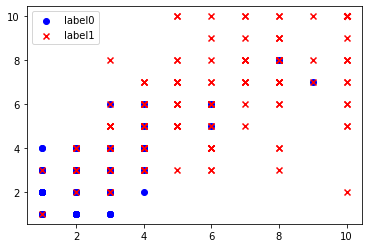

In [36]:
x_data = data_class[:,:-1]
y_data = data_class[:,-1]
    
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    # 切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])

    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [37]:
# 数据处理，添加偏置项
x_data = data_class[:,:-1]
y_data = data_class[:,-1,np.newaxis]#增加一维

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
# 给样本添加偏置项
X_data = np.concatenate((np.ones((524,1)),x_data),axis=1)#能够一次完成多个数组的拼接
print(X_data.shape)

(524, 2)
(524, 1)
(524, 3)


In [38]:
#逻辑回归函数
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

#逻辑回归的代价函数
def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat*ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat*ws)))
    return np.sum(left + right) / -(len(xMat))


#随机梯度下降 
def gradAscent(xArr, yArr):
    #需要标准化    
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    #学习率、迭代周期、保存cost值 
    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n,1)))
    
    for i in range(epochs+1):             
        # xMat和weights矩阵相乘
        h = sigmoid(xMat*ws)   
        # 计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad 
        
        if i % 50 == 0:
            costList.append(cost(xMat,yMat,ws))
    return ws,costList

In [39]:
# 训练模型，得到权值和cost值的变化
ws,costList = gradAscent(X_data, y_data)
print(ws)

[[1.        ]
 [1.56228179]
 [1.58599847]]


In [43]:
if scale == False:
    # 画图决策边界
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1])/ws[2]
    plt.plot(x_test, y_test, 'k')
    plt.show()

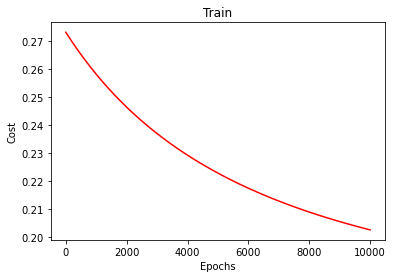

In [41]:
# 画图 loss值的变化
x = np.linspace(0,10000,201)
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [42]:
# 预测
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       340
         1.0       0.93      0.92      0.92       184

    accuracy                           0.95       524
   macro avg       0.94      0.94      0.94       524
weighted avg       0.95      0.95      0.95       524

